# Supplier Segmentation

Sering kali sebuah perusahaan memiliki banyak supplier dengan karakteristik dan kepentingan yang berbeda-beda. Oleh karena itu, supplier perlu dikelompokkan menjadi beberapa bagian untuk memudahkan proses manajemen kedepannya. Salah satu tools yang digunakan untuk mengelompokkan supplier yakni *Kraljic Matrix*. 

<img src="https://user-images.githubusercontent.com/61647791/128868519-8462efae-994e-4f79-a64a-4fdcc871a8b4.png" width=300 height=300 />

*Sumber gambar: Wikipedia* 

Tools ini membagi supplier menjadi empat bagian berdasarkan risiko/kompleksitas serta keuntungan bagi perusahaan. Berikut adalah empat bagian dari Kraljic Matric:

**1. Leverage items**

Supplier dengan kategori Leverage memiliki risiko rendah serta memberikan keuntungan yang tinggi bagi perusahaan. Supplier pipa besi bagi perusahaan migas adalah salah satu contohnya. Pipa besi sangat penting bagi perusahaan migas untuk mengalirkan minyak dari suatu tempat ke tempat lain. Selain itu, supplier pipa besi sangat mudah ditemukan.

**2. Strategic items**

Supplier dengan tipe ini meskipun dapat memberikan keuntungan yang tinggi namun risikonya sangat besar. Misalkan sebuah perusahaan memproduksi oli dengan bahan berupa zat kimia yang hanya diproduksi oleh supplier tertentu. Jika menggunakan bahan tersebut kualitas oli akan sangat bagus yang berdampak pada meningkatnya profit perusahaan. Perusahaan tersebut harus menjalin hubungan dengan sebaik-baiknya karena supplier tersebut jarang ditemukan.

**3. Non-critical items**

Supplier dengan tipe ini memiliki risiko dan profit yang rendah bagi perusahaan. Contoh dari tipe ini yaitu supplier kertas pada perusahaan percetakan. Supplier kertas banyak dijumpai di daerah tersebut sehingga dapat dikategorikan sebagai non-critical.

**4. Bottleneck items**

Supplier dengan tipe bottleneck memiliki dampak/profit yang rendah bagi perusahaan dan risikonya sangat besar. Misalkan dalam sebuah pengeboran minyak memerlukan sebuah komponen yang kurang krusial dan perlu diganti setiap 6 bulan sekali. Komponen tersebut murah namun memerlukan waktu tunggu *(lead time)* hampir satu tahun dengan supplier yang jarang ditemukan. 

Pada sesi ini kita akan mengelompokkan supplier berdasarkan Kraljic Matrix dengan menggunakan bantuan python. Sumber materi maupun data berasal dari kursus **Udemy-RA: Data Science and Supply Chain analytics. A-Z with Python. Haytham Omar, Consultant-Supply chain.**

In [6]:
#mengimpor library
import pandas as pd
import numpy as np

Data yang digunakan terdiri dari beberapa kolom, yakni:
1. **supplier** : nama supplier (anonim)
2. **product** : nama produk (anonim)
3. **availability** : menunjukkan risiko ketersediaan (regular = 0, irregular = 0.5)
4. **no_suppliers** : menunjukkan risiko jumlah supplier (many suppliers = 0, few suppliers = 0.5)
5. **standard** : menunjukkan risiko kompleksitas produk/item (standard = 0, complex = 0.5)
6. **price fluctuation** : menunjukkan risiko harga yang selalu berubah-ubah (steady = 0, volatile = 0.5)
7. **Quantity** : jumlah produk yang dipesan/dibutuhkan
8. **price** : harga per unit produk

In [7]:
supplier = pd.read_csv("supplier_data.csv")

#cek 5 data teratas
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596


### 1. Menghitung Risk Index
Risk index merupakan penjumlahan risiko dari berbagai faktor, yakni availability, no_suppliers, standard, serta price_fluctuation.

In [8]:
supplier["risk_index"] = supplier["availability"] + supplier["no_suppliers"] + supplier["standard"] + supplier["price_fluctuation"]

### 2. Menghitung Value
Value merupakan perkalian antara Quantity dengan Price

In [9]:
supplier["value"] = supplier["Quantity"] * supplier["price"]
supplier.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index,value
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0,255600
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0,8211780
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0,11433723
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0,12422442
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5,13959672


### 3. Mengelompokkan Supplier Berdasarkan Risk Index dan Value
Pada sesi ini sebuah supplier dikatakan memiliki risiko tinggi apabila nilai risk indeks lebih dari atau sama dengan satu. Sedangkan untuk menentukan supplier mana yang memberikan profit tinggi atau rendah bagi perusahaan ditentukan dengan median dari sebaran value.

In [10]:
supplier["value"].describe()

count    2.400000e+01
mean     5.064812e+06
std      4.847504e+06
min      1.189500e+05
25%      7.975622e+05
50%      3.011452e+06
75%      8.499426e+06
max      1.399081e+07
Name: value, dtype: float64

Dikarenakan median dari sebaran value di atas kurang lebih 3 juta maka supplier yang memberikan keuntungan bagi perusahaan memiliki value lebih dari atau sama dengan 3 juta, begitupun sebaliknya. Selanjutnya kita akan membuat fungsi untuk mengelompokkan supplier.

In [11]:
def category(risk_index, value):
    if ((risk_index >= 1) and (value >= 3000000)):
        return "Strategic"
    
    elif ((risk_index < 1) and (value >= 3000000)):
        return "Leverage"
    
    elif ((risk_index >= 1) and (value < 3000000)):
        return "Bottleneck"
    
    elif ((risk_index < 1) and (value < 3000000)):
        return "Non-critical"

Untuk menggunakan fungsi di atas, saya membuat for looping untuk melakukan iterasi dan mengaplikasikan fungsi pada setiap baris. Kita bisa mengecek hasilnya dengan memanggil tabel supplier.

In [12]:
for i in range(supplier.shape[0]):
    supplier.loc[i,"Category"] = category(supplier.loc[i,"risk_index"], supplier.loc[i,"value"])

In [13]:
supplier

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price,risk_index,value,Category
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360,1.0,255600,Bottleneck
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740,1.0,8211780,Strategic
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919,1.0,11433723,Strategic
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246,1.0,12422442,Strategic
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596,0.5,13959672,Leverage
5,supplier1,product_6,0.0,0.5,0.0,0.0,3663,917,0.5,3358971,Leverage
6,supplier2,product_7,0.5,0.0,0.5,0.0,3517,2639,1.0,9281363,Strategic
7,supplier2,product_8,0.5,0.0,0.5,0.0,450,1384,1.0,622800,Bottleneck
8,supplier2,product_9,0.5,0.0,0.5,0.0,1438,842,1.0,1210796,Bottleneck
9,supplier2,product_10,0.5,0.0,0.5,0.0,2887,323,1.0,932501,Bottleneck


Kita juga dapat melakukan visualisasi data di atas menggunakan bantuan library matplotlib dan seaborn.

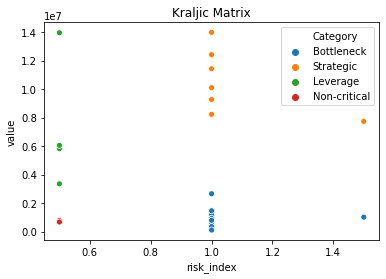

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=supplier, x="risk_index", y="value", hue="Category")
plt.title("Kraljic Matrix")
plt.show()

Demikian tutorial singkat melakukan segmentasi supplier menggunakan python, mohon maaf apabila terdapat kekurangan maupun kesalahan. Sekian dan terima kasih. Selamat mencoba :)